In [120]:
import re
import urllib.request
from bs4 import BeautifulSoup
from pandas import DataFrame
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import random

import unicodedata
import unicodeblock.blocks

def kanaOnly(s):
    result = ''   
    for c in s:
        if unicodeblock.blocks.of(c) in ['HIRAGANA', 'KATAKANA']:
            result += c
    return result

In [122]:
Anki = pd.read_csv('data/Core Japanese Vocabulary Extended.txt', 
                   sep='\t', header=None, 
                   names=['jp', 'en', 'jp_kana', 'pos', 'more_en', 'sound', 'level'])[['jp', 'en', 
                                                    'jp_kana', 'pos', 'more_en', 'level']]

Anki.level = Anki.level.fillna('jlpt-n0').apply(lambda s: s[-7:]) # The last level marker is always the lowest
Anki.pos = Anki.pos.fillna('None') # These mostly seem like interjections
Anki['kana'] = Anki.jp_kana.fillna('').apply(kanaOnly)

JLPT = Anki[Anki.level != 'jlpt-n0']

Anki.sample(20)

,jp,en,jp_kana,pos,more_en,level,kana
17759,内海,"inlet, bay, inland sea",内海[うちうみ],Noun,NaN,jlpt-n0,うちうみ
417,開ける,"to open (a door, etc.), to unwrap (e.g. parcel...",開[あ]ける,"Ichidan verb, Transitive verb","to open (for business, etc.); to empty, to rem...",jlpt-n5,あける
6278,ワット,watt,ワット,Noun,NaN,jlpt-n1,ワット
3362,近々,"soon, nearness, before long",近々[ちかぢか],"Adverbial noun, Temporal noun",NaN,jlpt-n2,ちかぢか
14795,年数,number of years,年数[ねんすう],Noun,NaN,jlpt-n0,ねんすう
7165,住宅,"residence, housing, residential building",住宅[じゅうたく],Noun,NaN,jlpt-n3,じゅうたく
8399,病人,"sick person, patient, invalid",病人[びょうにん],Noun,NaN,jlpt-n0,びょうにん
9025,不法,"unlawful, illegal",不法[ふほう],"Na-adjective, Noun","unreasonable, outrageous, unjust, unwarranted",jlpt-n0,ふほう
5966,怠い,"sluggish, languid, listless, heavy (heart, leg...",怠[だる]い,I-adjective,"bothersome, tiresome",jlpt-n1,だるい
7139,脅迫,"threat, menace, coercion, terrorism",脅迫[きょうはく],"Noun, Suru verb",NaN,jlpt-n1,きょうはく


<AxesSubplot:ylabel='level'>

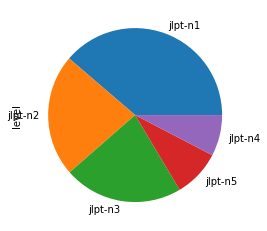

In [78]:
JLPT.level.value_counts()[:].plot.pie()

In [123]:
JLPT[JLPT.pos.fillna('').str.contains('Suru verb')].sample(20)

,jp,en,jp_kana,pos,more_en,level,kana
5273,類似,"resemblance, similarity, likeness, analogy",類似[るいじ],"Noun, Suru verb, No-adjective",NaN,jlpt-n1,るいじ
1980,勘定,"calculation, computation, counting, reckoning,...",勘定[かんじょう],"Noun, Suru verb","bill, check, account, payment (of a bill), set...",jlpt-n3,かんじょう
6743,演習,"practice, practising",演習[えんしゅう],"Noun, Suru verb","exercises, manoeuvres, maneuvers; seminar (stu...",jlpt-n1,えんしゅう
1622,成功,"success, hit",成功[せいこう],"Noun, Suru verb",NaN,jlpt-n3,せいこう
5094,操縦,"steering, piloting, flying, control, operation...",操縦[そうじゅう],"Noun, Suru verb","management, handling, control, manipulation",jlpt-n1,そうじゅう
1669,要求,"demand, firm request, requisition, requirement...",要求[ようきゅう],"Noun, Suru verb",NaN,jlpt-n3,ようきゅう
1569,作曲,"composition, setting (of music)",作曲[さっきょく],"Noun, Suru verb",NaN,jlpt-n3,さっきょく
4504,着陸,"landing, alighting, touch down",着陸[ちゃくりく],"Noun, Suru verb",NaN,jlpt-n1,ちゃくりく
2076,論争,"dispute, controversy",論争[ろんそう],"Noun, Suru verb",NaN,jlpt-n3,ろんそう
3382,開会,opening of a meeting,開会[かいかい],"Noun, Suru verb",NaN,jlpt-n2,かいかい


In [85]:
JLPT[JLPT.pos.fillna('').str.contains("Adverb taking the ")].sample(20)

,jp,en,jp_kana,pos,more_en,level
6517,おどおど,"timidly, nervously, hesitantly, trembling (wit...",おどおど,"Adverb, Adverb taking the 'to' particle, Suru ...",NaN,jlpt-n1
7231,着々,steadily,着々[ちゃくちゃく],"Adverb, Adverb taking the 'to' particle",NaN,jlpt-n2
464,段々,"gradually, by degrees, little by little, more ...",段々[だんだん],"Adverb, Adverb taking the 'to' particle","steps, stairs, staircase, terrace",jlpt-n5
2817,ばったり,"with a clash, with a thud, with a bang, with a...",ばったり,"Adverb, Adverb taking the 'to' particle",unexpectedly (meeting someone); suddenly (endi...,jlpt-n3
4153,うっかり,"carelessly, thoughtlessly, inadvertently",うっかり,"Adverb, Adverb taking the 'to' particle, Suru ...",NaN,jlpt-n2
6946,ちやほや,"to pamper, to make a fuss of, to spoil, to faw...",ちやほや,"Suru verb, Adverb, Adverb taking the 'to' part...",NaN,jlpt-n1
1178,はっきり,"clearly, plainly, distinctly",はっきり,"Adverb, Adverb taking the 'to' particle","to be clear, to be definite, to be certain, to...",jlpt-n4
5303,依然,"still, as yet, as it has been",依然[いぜん],"Taru-adjective, Adverb taking the 'to' particl...",NaN,jlpt-n1
6510,だぶだぶ,"loose (of clothing), baggy",だぶだぶ,"Na-adjective, No-adjective, Adverb, Adverb tak...","flabby, saggy; sloshing, slopping, overflowing...",jlpt-n1
2761,たっぷり,"full, in plenty, ample",たっぷり,"Adverb, Adverb taking the 'to' particle, Noun,...",NaN,jlpt-n3


In [89]:
# 51 terms
JLPT[JLPT.jp.str.contains('々')]

,jp,en,jp_kana,pos,more_en,level
249,時々,"sometimes, at times",時々[ときどき],"Adverb, Noun, No-adjective",NaN,jlpt-n5
442,色々,"various, all sorts of, variety of",色々[いろいろ],"Na-adjective, No-adjective, Adverb, Adverb tak...",various colors (colours),jlpt-n5
464,段々,"gradually, by degrees, little by little, more ...",段々[だんだん],"Adverb, Adverb taking the 'to' particle","steps, stairs, staircase, terrace",jlpt-n5
1582,屡々,"often, again and again, frequently, repeatedly",屡々[しばしば],Adverb,NaN,jlpt-n3
1621,我々,we,我々[われわれ],Pronoun,NaN,jlpt-n3
1824,様々,"varied, various",様々[さまざま],"Na-adjective, Noun",NaN,jlpt-n3
1940,次々,"in succession, one by one",次々[つぎつぎ],"Adverb, Adverb taking the 'to' particle, Noun",NaN,jlpt-n3
1964,徐々,"slow, gradual, steady",徐々[じょじょ],"Taru-adjective, Adverb taking the 'to' particle","calm, composed, relaxed",jlpt-n3
1969,少々,"just a minute, small quantity",少々[しょうしょう],"Adverbial noun, Noun",NaN,jlpt-n3
2094,度々,"often, again and again, over and over again, r...",度々[たびたび],Adverb,NaN,jlpt-n3


In [111]:
unicodeblock.blocks.of('わ')

'HIRAGANA'

In [118]:
def kanaOnly(s):
    result = ''   
    for c in s:
        if unicodeblock.blocks.of(c) in ['HIRAGANA', 'KATAKANA']:
            result += c
    return result
    

JLPT.jp_kana.apply(kanaOnly).value_counts()

かく      7
せい      6
さす      6
し       6
きゅう     5
       ..
あたい     1
けむり     1
いちば     1
オーバー    1
ようふう    1
Name: jp_kana, Length: 6740, dtype: int64